In [44]:
from pathlib import Path

processed_data_dir = Path('../data/processed/')
file_name = 'train.csv'
file_path = processed_data_dir / file_name
models_trained_dir = Path('../models/trained/')

from ..src.utils import residual_plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(file_path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


### Try simple OLS

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

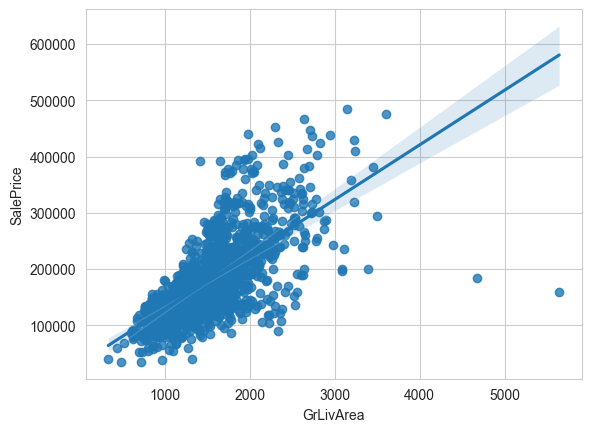

In [11]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df)

In [12]:
x = df['GrLivArea'].values
y = df['SalePrice'].values
# np.polyfit(x,y,deg=1)
x_mean = x.mean()
y_mean = y.mean()
x_me = x - x_mean
y_me = y- y_mean
x_sme = np.sum(x_me**2)
m = np.sum(x_me*y_me)/x_sme
b = y_mean - m*x_mean
print(f'y_hat_i = {np.round(m, decimals=3)}*x_i + {np.round(b, decimals=3)}')

y_hat_i = 97.269*x_i + 31670.473


In [12]:
line_x = np.linspace(np.min(x), np.max(x), 2)
line_y = line_x*m + b

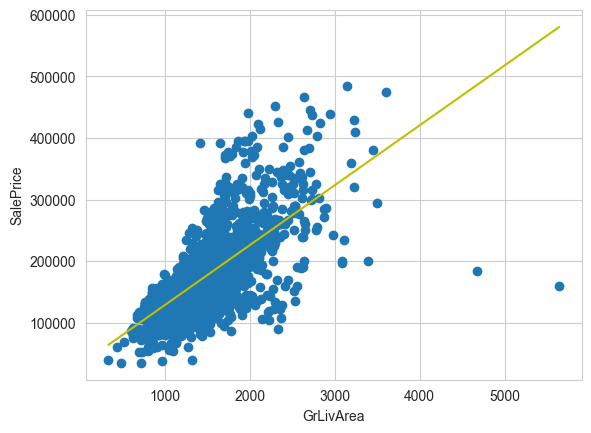

In [15]:
fig, ax = plt.subplots()
ax.plot(line_x, line_y, color='y')
ax.scatter(x, y)
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

In [24]:
y_pred = x*m+b
R2 = 1 - (np.sum((y-y_pred)**2)/np.sum(y_me**2))

print(f'GrLivArea describe {np.round(R2, decimals=4)*100}% of SalePrice\'s varience.')

GrLivArea describe 47.4% of SalePrice's varience.


In [31]:
import statsmodels.api as sm
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1297.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          4.12e-203
Time:                        16:51:25   Log-Likelihood:                -17704.
No. Observations:                1442   AIC:                         3.541e+04
Df Residuals:                    1440   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.167e+04   4285.965      7.389      0.0

### Multiple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r2_train = lin_reg.score(X_train, y_train)
r2_test = lin_reg.score(X_test, y_test)
y_test_pred = lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f'''Evaluations for Sale Prices\n\
\tR2 Train: {r2_train}\n\
\tR2 Test: {r2_test}\n\
\tMean:{y_mean}\n\
\tMean Absolute Error: {mae}\n\
\tMean Squared Error: {mse}\n\
\tRoot Mean Squared Error: {rmse}''')

Evaluations for Sale Prices
	R2 Train: 0.9405514654007722
	R2 Test: 0.6115052618030519
	Mean:177957.39528432733
	Mean Absolute Error: 18585.20180039458
	Mean Squared Error: 1819284646.02532
	Root Mean Squared Error: 42653.07311349699


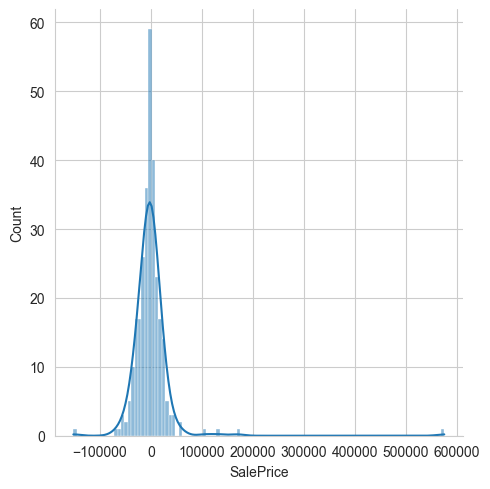

In [31]:
residuals = (y_test - y_test_pred)
sns.displot(residuals, kde=True)

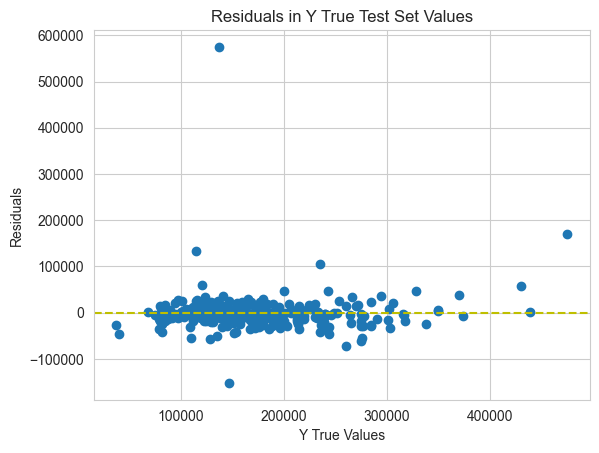

In [42]:
residual_plot( X_test, y_test, lin_reg, 'Residuals in Y True Test Set Values')

## Deploy Model

In [32]:
final_lin_reg = LinearRegression()
final_lin_reg.fit(X, y)

LinearRegression()

In [33]:
final_lin_reg.coef_

array([ 4.10010786e+00,  7.39308257e-01,  6.99106514e+03,  5.15646443e+03,
        3.07002774e+02,  1.16980075e+02,  1.34283865e+01,  1.34995898e+01,
        5.58104566e+00, -2.28700838e+00,  1.67938687e+01,  1.86279755e+01,
        2.29488616e+01, -1.48433512e+01,  2.67331686e+01,  3.00970979e+03,
       -1.10646011e+03,  1.59998063e+03,  1.41180484e+03, -1.04881281e+03,
       -6.21022738e+03,  5.40758479e+02,  4.62687582e+03, -5.53945432e+01,
        4.60603537e+03,  2.14361099e+01,  2.15547424e+01,  1.13227926e+01,
        1.73077716e+01,  4.17826633e+01,  2.48139972e+01,  3.58623511e+01,
        5.18879834e-01, -1.76022846e+02, -4.38700550e+02, -5.69261100e+03,
        6.07354719e+02,  1.58330168e+04,  1.14301472e+04,  1.23082490e+04,
        1.31540702e+04,  6.96303146e+03,  8.40322290e+03,  1.04825734e+04,
        1.35701564e+04,  9.65890458e+03,  6.31353761e+02,  1.57661438e+03,
       -2.74692321e+03,  3.78602500e+04,  2.92534613e+04,  3.21750434e+04,
        2.57625772e+04,  

In [35]:
final_lin_reg.intercept_

-519354.38421848

In [40]:
y_pred = final_lin_reg.predict(X)
final_lin_reg.score(X, y.reshape(-1,1))

0.9376863886800778

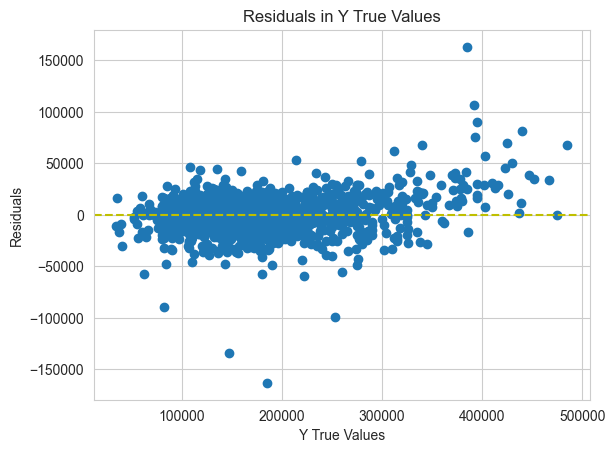

In [43]:
residual_plot(X,y,final_lin_reg, 'Residuals in Y True Values')

In [45]:
from joblib import dump, load
model_path = models_trained_dir / '0.1-os-linear-regression-01.joblib'
dump(final_lin_reg, model_path )

['..\\models\\trained\\0.1-os-linear-regression-01.joblib']

In [46]:
loaded_reg = load(model_path)
loaded_reg.intercept_

-519354.38421848